## PCÜ Einführung in Kultur und Gesundheit 20.10.23

In [1]:
print('Hello World!')

Hello World!


In [2]:
import time 
time.sleep(3)

In [3]:
def say_hello(recipient):
    return 'Hello, {}!'.format(recipient)

say_hello('Tim')

'Hello, Tim!'

In [4]:
z=3
time.sleep(z)
print(str(z)+' Sekunden sind vergangen.')

3 Sekunden sind vergangen.


# This is a level 1 heading (#)

## This is a level 2 heading (##)

### This is a level 3 heading (###)

#### level 4 heading

##### level 5 heading

###### level 6 heading 

(there is no level 7 heading)

This is some plain text **bold** __bold__ *italic* _italic_ ( ** b ** __ b __ * i * _ i _ )

* test (*)
* test (*)
* test (*)

1. first
2. second

[hyperlink example](https://www.google.de)

Inline uses single backticks `foo()`, and code blocks use triple backticks:
```
bar()
```
Or can be indented by 4 spaces:

    foo()

And finally, adding images is easy: ![Alt test example](https://tunnelfly-skyshop.de/uploads/slider/entries/1_image.jpg)






---

[Markdown Cheat Sheet](https://www.markdownguide.org/cheat-sheet/)


## Selbstständige Arbeit 21.10.23

In [5]:
import numpy as np
def square(x):
    return x * x

In [6]:
x = np.random.randint(1, 10)
y = square(x)
print('%d squared is %d' % (x,y))

4 squared is 16


In [7]:
print('Is %d squared %d?' % (x,y))

Is 4 squared 16?


In [8]:
y = 10
print('Is %d squared %d?' % (x,y))

Is 4 squared 10?


In [9]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(style="darkgrid")

pandas for working with the data (e.g. imports NumPy etc), Matplotlib for plotting charts, Seaborn for making charts prettier 

In [10]:
df = pd.read_csv('fortune500.csv')

loads the data (data set of Fortune 500 companies spanning over 50 years) into the most-used pandas data structure **DataFrame** (basically looks like a table)

In [11]:
df.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [12]:
df.tail()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
25495,2005,496,Wm. Wrigley Jr.,3648.6,493
25496,2005,497,Peabody Energy,3631.6,175.4
25497,2005,498,Wendy's International,3630.4,57.8
25498,2005,499,Kindred Healthcare,3616.6,70.6
25499,2005,500,Cincinnati Financial,3614.0,584


In [13]:
df.columns = ['year', 'rank', 'company', 'revenue', 'profit']

renaming the columns to refer to them later

In [14]:
df.head()

,year,rank,company,revenue,profit
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [15]:
len(df)

25500

the length of the data set (number of columns)

In [16]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit      object
dtype: object

the data types (dtypes) of the different columns (to check if the data set has been imported as we would expect)

**profit column** — we would expect it to be a float64 like the revenue column - probably contains some non-integer values

In [17]:
non_numberic_profits = df.profit.str.contains('[^0-9.-]')
df.loc[non_numberic_profits].head()

,year,rank,company,revenue,profit
228,1955,229,Norton,135.0,N.A.
290,1955,291,Schlitz Brewing,100.0,N.A.
294,1955,295,Pacific Vegetable Oil,97.9,N.A.
296,1955,297,Liebmann Breweries,96.0,N.A.
352,1955,353,Minneapolis-Moline,77.4,N.A.


some of the values are strings, which have been used to indicate missing data

In [18]:
set(df.profit[non_numberic_profits])

{'N.A.'}

there's only the string 'N.A.' that's non_numberic in the profit column

In [19]:
len(df.profit[non_numberic_profits])

369

there are 369 rows with the string 'N.A.' in the profit column (i.e. there are 369 values missing)

Now we have to check how the missing values are distributed throughout the years

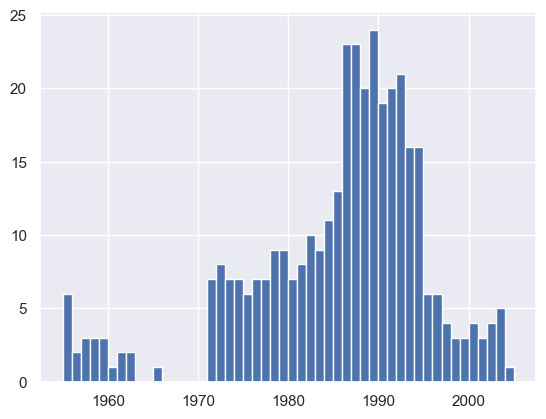

In [20]:
bin_sizes, _, _ = plt.hist(df.year[non_numberic_profits], bins=range(1955, 2006))

* most invalid values in a single year is fewer than 25
* there are 500 data points per year
* -> removing these values would account for less than 4% of the data for the worst years
* other than a surge around the 90s, most years have fewer than half the missing values of the peak

That is acceptable here **-> Next step:** removing of the rows with missing value

In [21]:
df = df.loc[~non_numberic_profits]
df.profit = df.profit.apply(pd.to_numeric)

In [22]:
len(df)

25131

the new number of columns -> equals 25500-369

In [23]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit     float64
dtype: object

The column profit has now the data type float64 (instead of object like before) ( = rows with 'N.A.' were successfully deleted = data set setup is finished)

## Plotting with matplotlib

#### Plotting the average profit by year:

In [24]:
group_by_year = df.loc[:, ['year', 'revenue', 'profit']].groupby('year')
avgs = group_by_year.mean()
x = avgs.index
y1 = avgs.profit
def plot(x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x, y)
    ax.margins(x=0, y=0)

defining some variables and a method to reduce the code

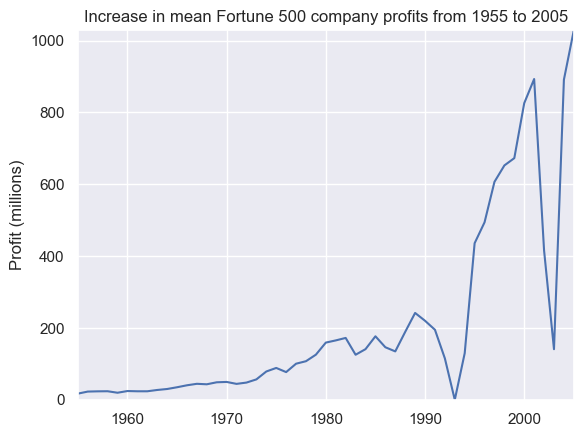

In [25]:
fig, ax = plt.subplots()
plot(x, y1, ax, 'Increase in mean Fortune 500 company profits from 1955 to 2005', 'Profit (millions)')

#### Plotting the average revenue by year:

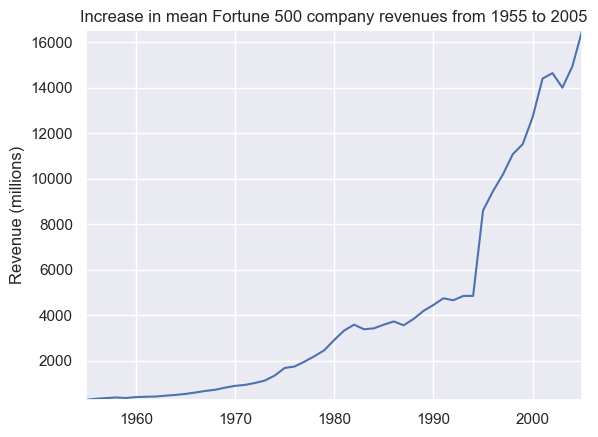

In [26]:
y2 = avgs.revenue
fig, ax = plt.subplots()
plot(x, y2, ax, 'Increase in mean Fortune 500 company revenues from 1955 to 2005', 'Revenue (millions)')

### Superimposing these plots with +/- their standard deviations:

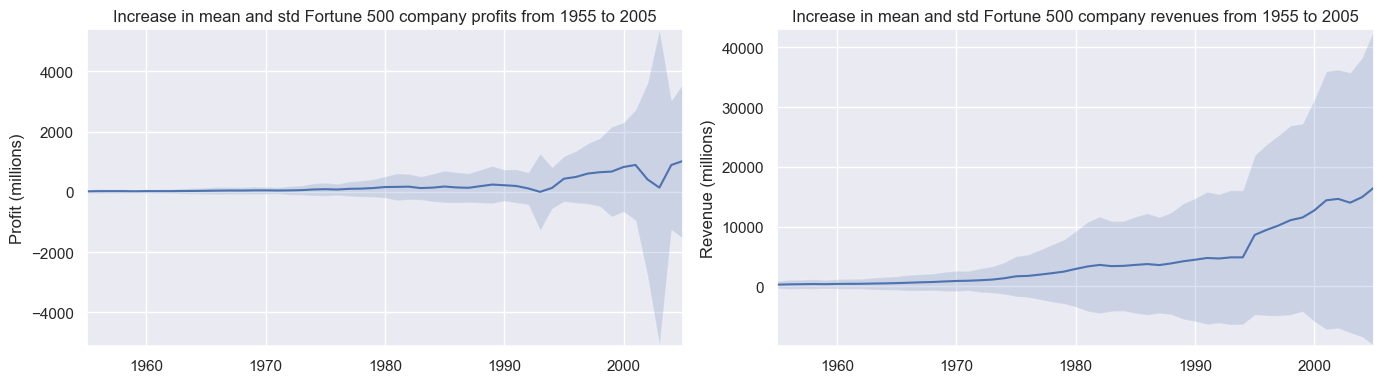

In [27]:
def plot_with_std(x, y, stds, ax, title, y_label):
    ax.fill_between(x, y - stds, y + stds, alpha=0.2)
    plot(x, y, ax, title, y_label)
fig, (ax1, ax2) = plt.subplots(ncols=2)
title = 'Increase in mean and std Fortune 500 company %s from 1955 to 2005'
stds1 = group_by_year.std().profit.values
stds2 = group_by_year.std().revenue.values
plot_with_std(x, y1.values, stds1, ax1, title % 'profits', 'Profit (millions)')
plot_with_std(x, y2.values, stds2, ax2, title % 'revenues', 'Revenue (millions)')
fig.set_size_inches(14, 4)
fig.tight_layout()

In [28]:
%pwd

'/Users/moritz/Documents/HTW/WiSe-23:24/Einfuehrung-in-KG'

In [29]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %code_wrap  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%code_wrap  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %

In [30]:
%matplotlib?

<Axes: xlabel='year', ylabel='revenue'>

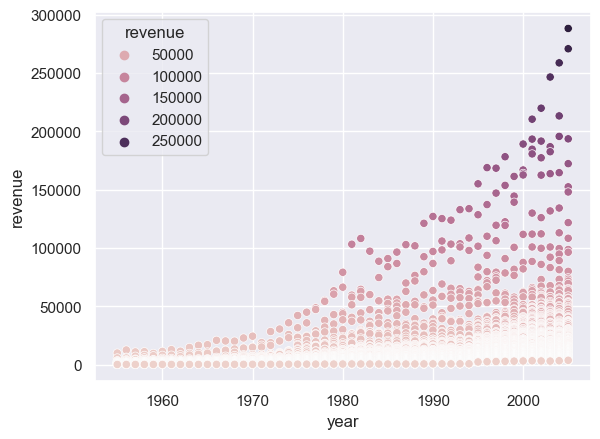

In [31]:
sns.scatterplot(x="year", y="revenue", hue="revenue", data=df)